# Problem 1.2: Mean Velocity Calculation

## Problem Statement
A point traversed half the distance with a velocity v₀. The remaining part of the distance was covered with velocity v₁ for half the time, and with velocity v₂ for the other half of the time. Find the mean velocity of the point averaged over the whole time of motion.

## Mathematical Analysis

Let's denote the total distance as $S$. Then:

- First half of the distance: $S/2$ covered with velocity $v_0$
- Second half of the distance: $S/2$ covered partially with velocity $v_1$ and partially with velocity $v_2$

Let's analyze this step by step:

### First Part of the Journey

Distance covered: $S/2$  
Velocity: $v_0$  
Time taken: $t_0 = \frac{S/2}{v_0} = \frac{S}{2v_0}$

### Second Part of the Journey

For the second half of the distance, we need to determine how much distance is covered at each velocity.

Let's denote the total time for the second part as $t_{second}$. We know that:
- For the first half of $t_{second}$, the velocity is $v_1$
- For the second half of $t_{second}$, the velocity is $v_2$

So we have:
- Time at velocity $v_1$: $t_1 = \frac{t_{second}}{2}$
- Time at velocity $v_2$: $t_2 = \frac{t_{second}}{2}$

Distance covered at velocity $v_1$: $S_1 = v_1 \cdot t_1 = v_1 \cdot \frac{t_{second}}{2}$  
Distance covered at velocity $v_2$: $S_2 = v_2 \cdot t_2 = v_2 \cdot \frac{t_{second}}{2}$

We know that $S_1 + S_2 = S/2$, so:

$v_1 \cdot \frac{t_{second}}{2} + v_2 \cdot \frac{t_{second}}{2} = \frac{S}{2}$

$\frac{t_{second}}{2} \cdot (v_1 + v_2) = \frac{S}{2}$

$t_{second} = \frac{S}{v_1 + v_2}$

Therefore:
- $t_1 = \frac{t_{second}}{2} = \frac{S}{2(v_1 + v_2)}$
- $t_2 = \frac{t_{second}}{2} = \frac{S}{2(v_1 + v_2)}$

### Total Time and Mean Velocity

Total time: $T = t_0 + t_1 + t_2 = \frac{S}{2v_0} + \frac{S}{2(v_1 + v_2)} + \frac{S}{2(v_1 + v_2)} = \frac{S}{2v_0} + \frac{S}{v_1 + v_2}$

Mean velocity: $v_{mean} = \frac{S}{T} = \frac{S}{\frac{S}{2v_0} + \frac{S}{v_1 + v_2}} = \frac{1}{\frac{1}{2v_0} + \frac{1}{v_1 + v_2}}$

Simplifying:

$v_{mean} = \frac{2v_0(v_1 + v_2)}{2v_0 + v_1 + v_2}$

This is our final formula for the mean velocity.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import ipywidgets as widgets
from IPython.display import display, Math

In [8]:
# Define a function to calculate the mean velocity
def calculate_mean_velocity(v0, v1, v2):
    return (2 * v0 * (v1 + v2)) / (2 * v0 + v1 + v2)

# Define a function to calculate times for each segment
def calculate_times(S, v0, v1, v2):
    t0 = S / (2 * v0)  # Time for first half of distance
    t_second = S / (v1 + v2)  # Total time for second half
    t1 = t_second / 2  # Time at velocity v1
    t2 = t_second / 2  # Time at velocity v2
    
    return t0, t1, t2

# Define a function to calculate distances for the second part
def calculate_distances(S, v1, v2):
    # For the second half of the journey
    t_second = S / (v1 + v2)  # Total time for second half
    
    # Distance covered at each velocity
    S1 = v1 * (t_second / 2)
    S2 = v2 * (t_second / 2)
    
    return S1, S2

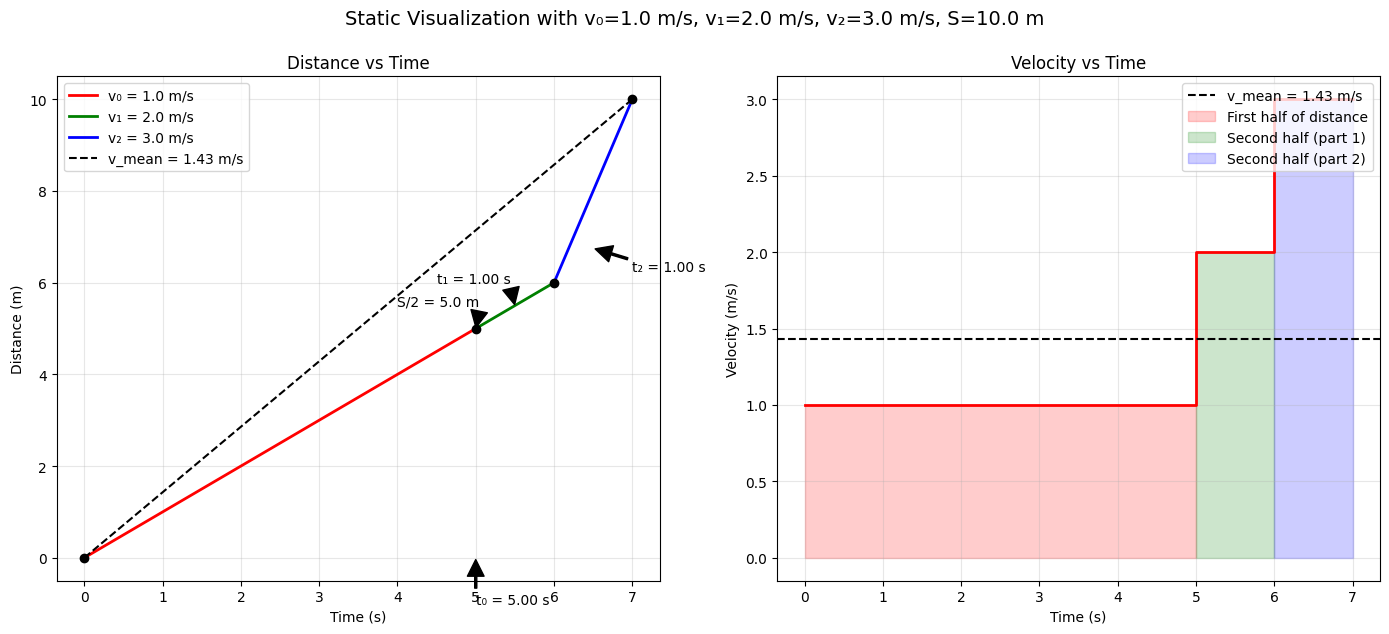


Default Parameters: v₀=1.0 m/s, v₁=2.0 m/s, v₂=3.0 m/s, S=10.0 m
Mean velocity: 1.43 m/s
Total time: 7.00 s
Time for first half (v₀): 5.00 s
Time for second half (v₁): 1.00 s
Time for second half (v₂): 1.00 s
Distance covered at v₁: 1.00 m
Distance covered at v₂: 1.50 m


<IPython.core.display.Math object>

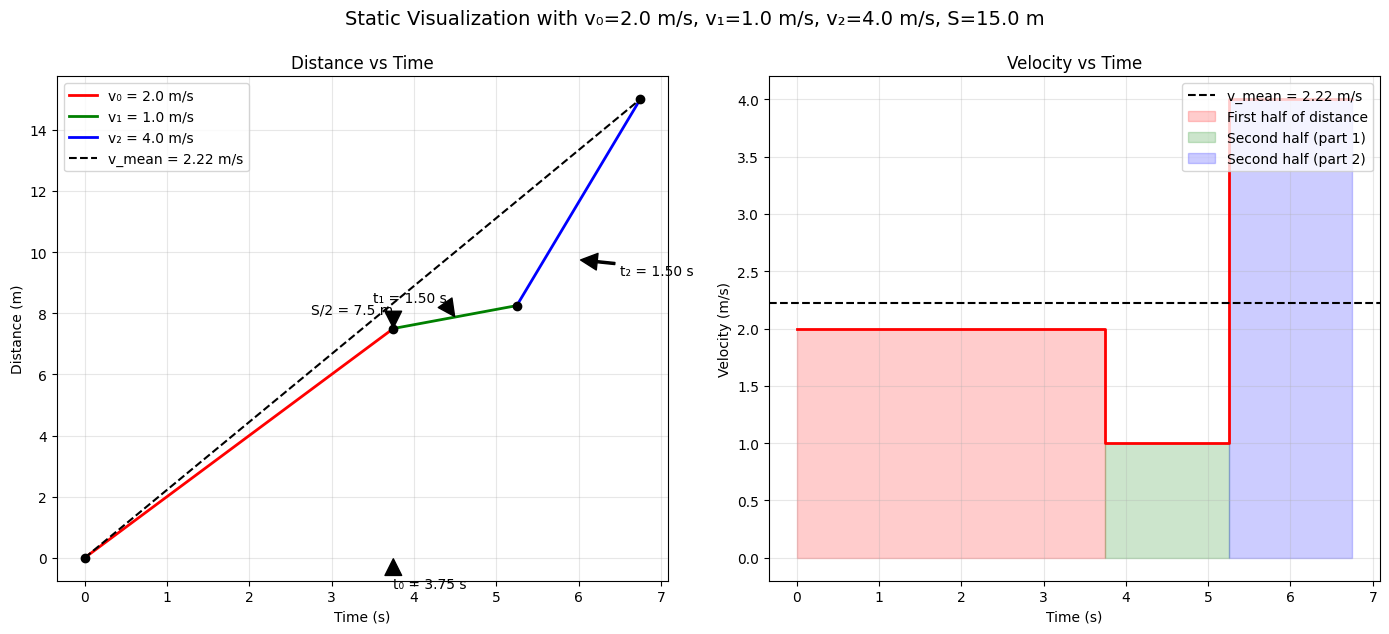


Alternative Parameters: v₀=2.0 m/s, v₁=1.0 m/s, v₂=4.0 m/s, S=15.0 m
Mean velocity: 2.22 m/s
Total time: 6.75 s
Time for first half (v₀): 3.75 s
Time for second half (v₁): 1.50 s
Time for second half (v₂): 1.50 s
Distance covered at v₁: 0.75 m
Distance covered at v₂: 3.00 m


<IPython.core.display.Math object>



Interactive Visualization (only works when running the notebook):



In [9]:
# Create a static visualization with default parameters for GitHub rendering
def create_static_visualization(v0=1.0, v1=2.0, v2=3.0, S=10.0):
    # Calculate mean velocity
    v_mean = calculate_mean_velocity(v0, v1, v2)
    
    # Calculate times for each segment
    t0, t1, t2 = calculate_times(S, v0, v1, v2)
    total_time = t0 + t1 + t2
    
    # Calculate distances for second part
    S1, S2 = calculate_distances(S/2, v1, v2)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # First subplot: Distance vs Time
    ax1.set_title('Distance vs Time')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Distance (m)')
    
    # Plot the three segments
    t_points = [0, t0, t0 + t1, total_time]
    d_points = [0, S/2, S/2 + S1, S]
    
    # Plot each segment with different colors
    ax1.plot([t_points[0], t_points[1]], [d_points[0], d_points[1]], 'r-', linewidth=2, label=f'v₀ = {v0} m/s')
    ax1.plot([t_points[1], t_points[2]], [d_points[1], d_points[2]], 'g-', linewidth=2, label=f'v₁ = {v1} m/s')
    ax1.plot([t_points[2], t_points[3]], [d_points[2], d_points[3]], 'b-', linewidth=2, label=f'v₂ = {v2} m/s')
    
    # Plot the mean velocity line
    ax1.plot([0, total_time], [0, S], 'k--', linewidth=1.5, label=f'v_mean = {v_mean:.2f} m/s')
    
    # Add markers for key points
    ax1.plot(t_points, d_points, 'ko', markersize=6)
    
    # Add annotations
    ax1.annotate(f'S/2 = {S/2} m', (t0, S/2), xytext=(t0-1, S/2+0.5), 
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
    
    ax1.annotate(f't₀ = {t0:.2f} s', (t0, 0), xytext=(t0, -1), 
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
    
    ax1.annotate(f't₁ = {t1:.2f} s', (t0 + t1/2, S/2 + S1/2), xytext=(t0 + t1/2 - 1, S/2 + S1/2 + 0.5), 
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
    
    ax1.annotate(f't₂ = {t2:.2f} s', (t0 + t1 + t2/2, S/2 + S1 + S2/2), xytext=(t0 + t1 + t2/2 + 0.5, S/2 + S1 + S2/2 - 0.5), 
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
    
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper left')
    
    # Second subplot: Velocity vs Time
    ax2.set_title('Velocity vs Time')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Velocity (m/s)')
    
    # Create step function for velocity
    ax2.step([0, t0, t0 + t1, total_time], [v0, v1, v2, v2], 'r-', linewidth=2, where='post')
    
    # Add horizontal line for mean velocity
    ax2.axhline(y=v_mean, color='k', linestyle='--', linewidth=1.5, label=f'v_mean = {v_mean:.2f} m/s')
    
    # Add shaded areas to represent distance covered
    ax2.fill_between([0, t0], [v0, v0], alpha=0.2, color='red', label='First half of distance')
    ax2.fill_between([t0, t0 + t1], [v1, v1], alpha=0.2, color='green', label='Second half (part 1)')
    ax2.fill_between([t0 + t1, total_time], [v2, v2], alpha=0.2, color='blue', label='Second half (part 2)')
    
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper right')
    
    plt.tight_layout()
    
    # Add a title above both subplots
    plt.suptitle(f'Static Visualization with v₀={v0} m/s, v₁={v1} m/s, v₂={v2} m/s, S={S} m', fontsize=14, y=1.05)
    
    return fig, v_mean, total_time, t0, t1, t2, S1, S2

# Generate and display static visualizations with different parameter sets
plt.figure(figsize=(1, 1))  # Create a dummy figure to avoid displaying an empty one
plt.close()  # Close it immediately

# Default parameters
fig1, v_mean, total_time, t0, t1, t2, S1, S2 = create_static_visualization(v0=1.0, v1=2.0, v2=3.0, S=10.0)
plt.figure(fig1.number)
plt.show()

# Display the calculated values for the default parameters
print("\nDefault Parameters: v₀=1.0 m/s, v₁=2.0 m/s, v₂=3.0 m/s, S=10.0 m")
print(f"Mean velocity: {v_mean:.2f} m/s")
print(f"Total time: {total_time:.2f} s")
print(f"Time for first half (v₀): {t0:.2f} s")
print(f"Time for second half (v₁): {t1:.2f} s")
print(f"Time for second half (v₂): {t2:.2f} s")
print(f"Distance covered at v₁: {S1:.2f} m")
print(f"Distance covered at v₂: {S2:.2f} m")

# Display the formula for default parameters
display(Math(r"v_{mean} = \frac{2v_0(v_1 + v_2)}{2v_0 + v_1 + v_2} = \frac{2 \cdot 1.0 \cdot (2.0 + 3.0)}{2 \cdot 1.0 + 2.0 + 3.0} = " + str(round(v_mean, 2)) + r" \, \text{m/s}"))

# Alternative parameters
fig2, v_mean, total_time, t0, t1, t2, S1, S2 = create_static_visualization(v0=2.0, v1=1.0, v2=4.0, S=15.0)
plt.figure(fig2.number)
plt.show()

# Display the calculated values for the alternative parameters
print("\nAlternative Parameters: v₀=2.0 m/s, v₁=1.0 m/s, v₂=4.0 m/s, S=15.0 m")
print(f"Mean velocity: {v_mean:.2f} m/s")
print(f"Total time: {total_time:.2f} s")
print(f"Time for first half (v₀): {t0:.2f} s")
print(f"Time for second half (v₁): {t1:.2f} s")
print(f"Time for second half (v₂): {t2:.2f} s")
print(f"Distance covered at v₁: {S1:.2f} m")
print(f"Distance covered at v₂: {S2:.2f} m")

# Display the formula for alternative parameters
display(Math(r"v_{mean} = \frac{2v_0(v_1 + v_2)}{2v_0 + v_1 + v_2} = \frac{2 \cdot 2.0 \cdot (1.0 + 4.0)}{2 \cdot 2.0 + 1.0 + 4.0} = " + str(round(v_mean, 2)) + r" \, \text{m/s}"))

# Now add the interactive widgets after the static visualizations
print("\n\nInteractive Visualization (only works when running the notebook):\n")

# Create interactive widgets
v0_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='v₀ (m/s):')
v1_slider = widgets.FloatSlider(value=2.0, min=0.1, max=5.0, step=0.1, description='v₁ (m/s):')
v2_slider = widgets.FloatSlider(value=3.0, min=0.1, max=5.0, step=0.1, description='v₂ (m/s):')
S_slider = widgets.FloatSlider(value=10.0, min=1.0, max=20.0, step=0.5, description='S (m):')

# Function to update the visualization
def update_visualization(v0, v1, v2, S):
    # Calculate mean velocity
    v_mean = calculate_mean_velocity(v0, v1, v2)
    
    # Calculate times for each segment
    t0, t1, t2 = calculate_times(S, v0, v1, v2)
    total_time = t0 + t1 + t2
    
    # Calculate distances for second part
    S1, S2 = calculate_distances(S/2, v1, v2)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # First subplot: Distance vs Time
    ax1.set_title('Distance vs Time')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Distance (m)')
    
    # Plot the three segments
    t_points = [0, t0, t0 + t1, total_time]
    d_points = [0, S/2, S/2 + S1, S]
    
    # Plot each segment with different colors
    ax1.plot([t_points[0], t_points[1]], [d_points[0], d_points[1]], 'r-', linewidth=2, label=f'v₀ = {v0} m/s')
    ax1.plot([t_points[1], t_points[2]], [d_points[1], d_points[2]], 'g-', linewidth=2, label=f'v₁ = {v1} m/s')
    ax1.plot([t_points[2], t_points[3]], [d_points[2], d_points[3]], 'b-', linewidth=2, label=f'v₂ = {v2} m/s')
    
    # Plot the mean velocity line
    ax1.plot([0, total_time], [0, S], 'k--', linewidth=1.5, label=f'v_mean = {v_mean:.2f} m/s')
    
    # Add markers for key points
    ax1.plot(t_points, d_points, 'ko', markersize=6)
    
    # Add annotations
    ax1.annotate(f'S/2 = {S/2} m', (t0, S/2), xytext=(t0-1, S/2+0.5), 
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
    
    ax1.annotate(f't₀ = {t0:.2f} s', (t0, 0), xytext=(t0, -1), 
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
    
    ax1.annotate(f't₁ = {t1:.2f} s', (t0 + t1/2, S/2 + S1/2), xytext=(t0 + t1/2 - 1, S/2 + S1/2 + 0.5), 
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
    
    ax1.annotate(f't₂ = {t2:.2f} s', (t0 + t1 + t2/2, S/2 + S1 + S2/2), xytext=(t0 + t1 + t2/2 + 0.5, S/2 + S1 + S2/2 - 0.5), 
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
    
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper left')
    
    # Second subplot: Velocity vs Time
    ax2.set_title('Velocity vs Time')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Velocity (m/s)')
    
    # Create step function for velocity
    ax2.step([0, t0, t0 + t1, total_time], [v0, v1, v2, v2], 'r-', linewidth=2, where='post')
    
    # Add horizontal line for mean velocity
    ax2.axhline(y=v_mean, color='k', linestyle='--', linewidth=1.5, label=f'v_mean = {v_mean:.2f} m/s')
    
    # Add shaded areas to represent distance covered
    ax2.fill_between([0, t0], [v0, v0], alpha=0.2, color='red', label='First half of distance')
    ax2.fill_between([t0, t0 + t1], [v1, v1], alpha=0.2, color='green', label='Second half (part 1)')
    ax2.fill_between([t0 + t1, total_time], [v2, v2], alpha=0.2, color='blue', label='Second half (part 2)')
    
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Display the calculated values
    print(f"Mean velocity: {v_mean:.2f} m/s")
    print(f"Total time: {total_time:.2f} s")
    print(f"Time for first half (v₀): {t0:.2f} s")
    print(f"Time for second half (v₁): {t1:.2f} s")
    print(f"Time for second half (v₂): {t2:.2f} s")
    print(f"Distance covered at v₁: {S1:.2f} m")
    print(f"Distance covered at v₂: {S2:.2f} m")
    
    # Display the formula
    display(Math(r"v_{mean} = \frac{2v_0(v_1 + v_2)}{2v_0 + v_1 + v_2} = \frac{2 \cdot" + str(v0) + r" \cdot (" + str(v1) + " + " + str(v2) + r")}{2 \cdot " + str(v0) + " + " + str(v1) + " + " + str(v2) + "} = " + str(round(v_mean, 2)) + r" \, \text{m/s}"))

# Create interactive output
interactive_output = widgets.interactive_output(update_visualization, 
                                               {'v0': v0_slider, 'v1': v1_slider, 'v2': v2_slider, 'S': S_slider})

# Display widgets and output
display(widgets.VBox([v0_slider, v1_slider, v2_slider, S_slider, interactive_output]))

## Conclusion

We have found that the mean velocity of the point averaged over the whole time of motion is:

$$v_{mean} = \frac{2v_0(v_1 + v_2)}{2v_0 + v_1 + v_2}$$

This formula gives us the average velocity considering the different portions of the journey:
- First half of the distance covered with velocity $v_0$
- Second half of the distance covered with velocities $v_1$ and $v_2$ for equal time periods

The interactive visualization above helps to understand how the mean velocity changes with different values of $v_0$, $v_1$, and $v_2$, as well as the total distance $S$.

Note that the mean velocity is not simply the arithmetic mean of the three velocities, as the time spent at each velocity is not equal. Instead, it's a weighted average that takes into account both the distances covered and the times spent at each velocity.